In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\mypc\Downloads\Forecasting_COVID-19-master (1)\Forecasting_COVID-19-master\Dataset\case_time_series_final.csv")

In [4]:
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,30/01/2020,1,1,0,0,0,0
1,31-Jan,31/01/2020,0,1,0,0,0,0
2,01-Feb,01/02/2020,0,1,0,0,0,0
3,02-Feb,02/02/2020,1,2,0,0,0,0
4,03-Feb,03/02/2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
276,01-Nov,01/11/2020,45928,8229245,53312,7542738,491,122050
277,02-Nov,02/11/2020,37592,8266837,58524,7601262,498,122548
278,03-Nov,03/11/2020,46027,8312864,53328,7654590,510,123058
279,04-Nov,04/11/2020,50465,8363329,55873,7710463,707,123765


In [5]:
df.columns

Index(['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed',
       'Daily Recovered', 'Total Recovered', 'Daily Deceased',
       'Total Deceased'],
      dtype='object')

In [6]:
all_data = df['Daily Confirmed'].values.astype(float)

In [7]:
print(all_data)

[1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 2.2000e+01 2.0000e+00
 1.0000e+00 3.0000e+00 5.0000e+00 9.0000e+00 1.5000e+01 8.0000e+00
 1.0000e+01 1.0000e+01 1.1000e+01 1.0000e+01 1.4000e+01 2.0000e+01
 2.5000e+01 2.7000e+01 5.8000e+01 7.8000e+01 6.9000e+01 9.4000e+01
 7.4000e+01 8.6000e+01 7.3000e+01 1.5300e+02 1.3600e+02 1.2000e+02
 1.8700e+02 3.0900e+02 4.2400e+02 4.8600e+02 5.6000e+02 5.7900e+02
 6.0900e+02 4.8400e+02 5.7300e+02 5.6500e+02 8.1300e+02 8.7100e+02
 8.5400e+02 7.5800e+02 1.2430e+03 1.0310e+03 8.8600e+02 1.0610e+03
 9.2200e+02 1.3710e+03 1.5800e+03 1.2390e+03 1.5370e+03 1.2920e+03
 1.6670e+03 1.4080e+03 1.8350e+03 1.6070e+03 1.5680e+03 1.9020

In [8]:
test_data_size = 15

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [9]:
print(len(train_data))
print(len(test_data))

266
15


In [10]:
print(test_data)

[54371. 53931. 50366. 45922. 36019. 43036. 50188. 48765. 48117. 47228.
 45928. 37592. 46027. 50465. 47628.]


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [12]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.99997956]
 [-1.        ]
 [-1.        ]
 [-0.99997956]
 [-0.99997956]]
[[ 0.26492949]
 [ 0.15509912]
 [-0.06997752]
 [ 0.11072961]
 [ 0.14988759]]


In [13]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [14]:
train_window = 12

In [15]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [16]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [17]:
train_inout_seq[:5]

[(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.]))]

In [18]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [19]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [21]:
epochs = 1000

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00677672
epoch:  26 loss: 0.02101416
epoch:  51 loss: 0.01877723
epoch:  76 loss: 0.00468525
epoch: 101 loss: 0.00588755
epoch: 126 loss: 0.01616780
epoch: 151 loss: 0.00002288
epoch: 176 loss: 0.00012105
epoch: 201 loss: 0.00006185
epoch: 226 loss: 0.00029897
epoch: 251 loss: 0.00241532
epoch: 276 loss: 0.00028841
epoch: 301 loss: 0.00075626
epoch: 326 loss: 0.00030760
epoch: 351 loss: 0.00000540
epoch: 376 loss: 0.00014023
epoch: 401 loss: 0.00012170
epoch: 426 loss: 0.00002263
epoch: 451 loss: 0.00005795
epoch: 476 loss: 0.00021080
epoch: 501 loss: 0.00000709
epoch: 526 loss: 0.00026368
epoch: 551 loss: 0.00062593
epoch: 576 loss: 0.00004545
epoch: 601 loss: 0.00000501
epoch: 626 loss: 0.00110769
epoch: 651 loss: 0.00001153
epoch: 676 loss: 0.00010542
epoch: 701 loss: 0.00009461
epoch: 726 loss: 0.00000414
epoch: 751 loss: 0.00001630
epoch: 776 loss: 0.00015106
epoch: 801 loss: 0.00020198
epoch: 826 loss: 0.00023263
epoch: 851 loss: 0.00038148
epoch: 876 loss: 0.0

In [22]:
fut_pred = 15

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.5209074020385742, 0.38542816042900085, 0.10897199809551239, 0.30220723152160645, 0.385877788066864, 0.29656651616096497, 0.2733292579650879, 0.26492950320243835, 0.15509912371635437, -0.0699775218963623, 0.11072961241006851, 0.1498875916004181]


In [23]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [24]:
test_inputs[fut_pred:]

[0.13861572742462158,
 0.06503871083259583,
 0.19377580285072327,
 0.3352310359477997,
 0.252044141292572,
 0.2626108229160309,
 0.1766619086265564,
 0.032252684235572815,
 0.0309009850025177,
 0.1642974615097046,
 0.21463528275489807,
 0.19739416241645813]

In [25]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[56238.21620509]
 [57557.9413788 ]
 [57840.66036522]
 [55712.46754289]
 [52112.34412104]
 [58411.45003349]
 [65332.85458893]
 [61262.51983345]
 [61779.54756528]
 [57574.0671891 ]
 [50508.12383965]
 [50441.98519617]
 [56969.07479167]
 [59432.1043852 ]
 [58588.49636704]]


In [26]:
x = np.arange(240, 255, 1)
print(x)

[240 241 242 243 244 245 246 247 248 249 250 251 252 253 254]


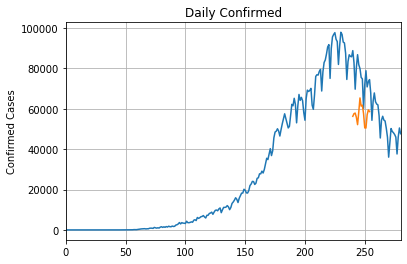

In [27]:
plt.title('Daily Confirmed')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['Daily Confirmed'])
plt.plot(x,actual_predictions)
plt.show()

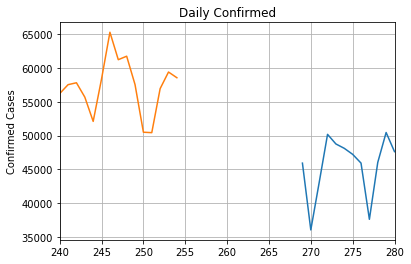

In [28]:
plt.title('Daily Confirmed')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(df['Daily Confirmed'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()

In [40]:
import csv
from itertools import zip_longest
list1 = df['Daily Confirmed'][-train_window:]
list2 = actual_predictions
d = [list1, list2]
export_data = zip_longest(*d, fillvalue = '')
with open('numbers.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("List1", "List2"))
      wr.writerows(export_data)
myfile.close()